In [1]:
from __future__ import print_function

import sys
import os
from glob import glob
from time import time
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np
import math
#plt.rcParams['figure.figsize'] = 10,8
import datetime

from   invisible_cities.database import load_db
from   invisible_cities.core.system_of_units_c import SystemOfUnits
import invisible_cities.sierpe.blr as blr
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.wfm_functions as wfm
import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.core.peak_functions_c as cpf
import invisible_cities.reco.pmaps_functions as pf
import invisible_cities.core.sensor_functions as sf
from   invisible_cities.core.core_functions import define_window

import invisible_cities.core.pmaps_functions_c as cpm
from   invisible_cities.core.core_functions import lrange

import S1S2prop as prop
 
units = SystemOfUnits()
t0 = time()

In [2]:
# Open Krypton MC file
#%%
mydf_file = os.environ['IC_DATA']+'/Kr/pmaps_NEXT_v0_08_09_Kr_ACTIVE_1_0_7bar__10000.root.h5'
print(mydf_file)

mydf = pf.read_pmaps(mydf_file)
#mydf
list(map(type, mydf))
S1df = mydf[0]
S2df = mydf[1]
S2Sidf = mydf[2]
print('S1df entries (tbins x events):',len(S1df))
print('S2df entries (tbins x events):',len(S2df))
print('S2Sidf entries:',len(S2Sidf))
type(S1df)
print('Keys of S1df panda dataframe: {} '.format(S1df.keys()))
print('Keys of S2df panda dataframe: {} '.format(S2df.keys()))
print('Keys of S2Sidf panda dataframe: {} '.format(S2Sidf.keys()))

# Convert S12df object  (an S12 pytable read as a PD dataframe) and return an S12L dictionary (list of dict, first dict)
S1 = pf.s12df_to_s12l(S1df,10000)
S2 = pf.s12df_to_s12l(S2df,10000)

evid_S1min = sorted(S1.keys())[0]
evid_S1max = sorted(S1.keys())[-1]
evid_S2min = sorted(S2.keys())[0]
evid_S2max = sorted(S2.keys())[-1]
print('First/last event ID (first item in sorted S1 dictionary): {}/{}'.format(evid_S1min,evid_S1max))
print('First/last event ID (first item in sorted S2 dictionary): {}/{}'.format(evid_S2min,evid_S2max))
print('Total number of events in S1 = {}'.format(len(S1)))
print('Total number of events in S2 = {}'.format(len(S2)))
len(S1), type(S1), len(S2), type(S2)


/Users/neus/InvCities/data/Kr/pmaps_NEXT_v0_08_09_Kr_ACTIVE_1_0_7bar__10000.root.h5
S1df entries (tbins x events): 51993
S2df entries (tbins x events): 91086
S2Sidf entries: 45115
Keys of S1df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2Sidf panda dataframe: Index(['event', 'evtDaq', 'peak', 'nsipm', 'nsample', 'ene'], dtype='object') 
First/last event ID (first item in sorted S1 dictionary): 0/9999
First/last event ID (first item in sorted S2 dictionary): 0/9999
Total number of events in S1 = 6980
Total number of events in S2 = 9977


(6980, dict, 9977, dict)

In [3]:
myS1 = prop.S12Prop(S1)
myS2 = prop.S12Prop(S2)

type(myS1)
myS2.length(), myS1.length()
_S1map = myS1.S1S2mapd(myS2)[0]
_S2map = myS1.S1S2mapd(myS2)[1]
_S1map._dict().keys() == _S2map._dict().keys()


#p.myhistos(_S1map.wS12_, 100, 0.0, 0.5,color="green", title="test_hist","width S1","prova")

#p.Histo(_S1map.wS12_,100,"title", "x", "Entries")
#p.myhistos(_S1map.wS12_,100,"red","title", "x", "Entries")
#fig, ax = plt.subplots()

True

In [4]:
len(_S1map.wS12_)

6973

### Plotting 4 plots for the notebook

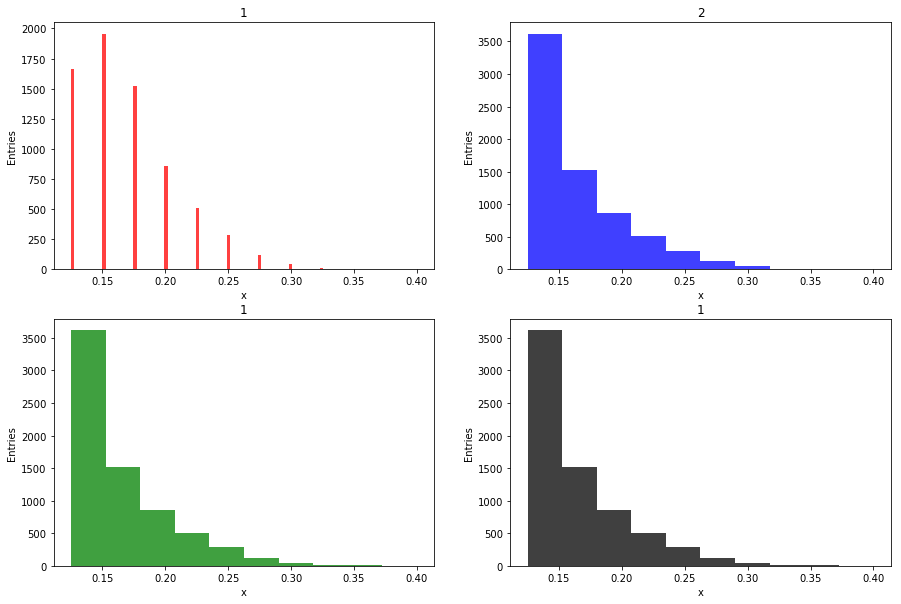

In [5]:
fig = plt.subplots(nrows = 1, ncols=2, figsize=(15, 10))
plt.subplot(221)   
prop.myhistos(_S1map.wS12_, 100 ,0., 0.4, color="red",title="1", xlabel ="x", ylabel = "Entries")
plt.subplot(222)   
prop.myhistos(_S1map.wS12_, 10 ,0., 0.4, color="blue",title="2", xlabel ="x", ylabel = "Entries")
plt.subplot(223)   
prop.myhistos(_S1map.wS12_, 10 ,0., 0.4, color="green",title="1", xlabel ="x", ylabel = "Entries")
plt.subplot(224)   
prop.myhistos(_S1map.wS12_, 10 ,0., 0.4, color="black",title="1", xlabel ="x", ylabel = "Entries")
#a.savefig("fig_red")
plt.show()


### Save a nice plot

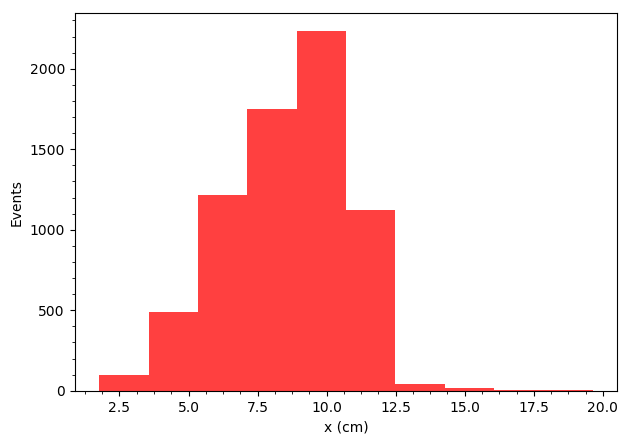

In [10]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
h1 = prop.h1(_S2map.wS12_, 10 ,0., 0.4, color="red",title="", xlabel ="x (cm)", ylabel = "Events")
ax = plt.axes()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
#    ax.xaxis.set_label_coords(0.95, -0.10)
#    ax.yaxis.set_label_coords(-0.1, 0.95)
h1.savefig("h1")

/Users/neus/miniconda/envs/IC3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


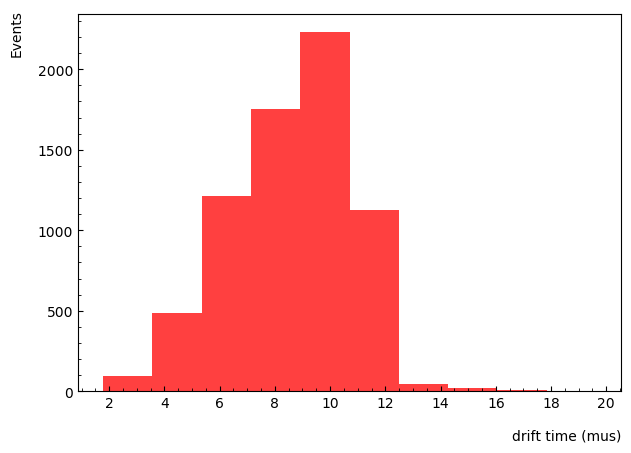

In [11]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FormatStrFormatter
h1 = prop.h1(_S2map.wS12_, 10 ,0., 0.4, color="red",title="", xlabel ="drift time (mus)", ylabel = "Events")
ax = plt.axes()

majorLocator = MultipleLocator(2)  # subdivisió entre numeros visibles
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.5)  # subdivisio entre les ticks petites

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)

#plt.xlabel("drift time (mus)",fontsize=15)
#plt.ylabel("Events",fontsize=15)
    
# for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(which='both', direction='in')

#plt.rc('font', weight='bold')

#ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_label_coords(0.9, -0.10)
ax.yaxis.set_label_coords(-0.1, 0.95)

#ax.text(0.3, 0.8, '', 
#          verticalalignment='center', horizontalalignment='center',
#          transform=axes.transAxes, fontsize=20)

plt.legend(loc='upper right')
h1.savefig("h1")

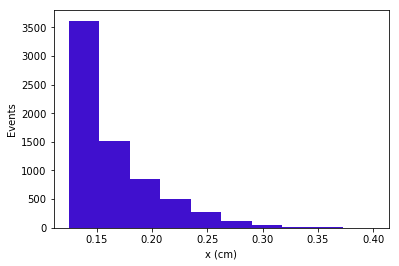

In [8]:
a = prop.myhistos(_S1map.wS12_, 10 ,0., 0.4, color="red",title="", xlabel ="x (cm)", ylabel = "Events")
b = prop.myhistos(_S1map.wS12_, 10 ,0., 0.4, color="blue",title="", xlabel ="x (cm)", ylabel = "Events")
#plt.show()

In [9]:
#prop.Histo(_S1map.wS12_,100,"title", "x", "Entries")